
Summary Statistics:
       murder_with_rape_gang_rape  dowry_deaths  abetment_to_suicide_of_women  \
count                 5322.000000   5322.000000                   5322.000000   
mean                     0.291432      7.875986                      5.753100   
std                      1.182866     12.460878                      9.189005   
min                      0.000000      0.000000                      0.000000   
25%                      0.000000      0.000000                      0.000000   
50%                      0.000000      3.000000                      2.000000   
75%                      0.000000     10.000000                      8.000000   
max                     34.000000    107.000000                    134.000000   

       miscarriage  acid_attack  attempt_to_acid_attack  \
count  5322.000000  5322.000000             5322.000000   
mean      0.257610     0.142803                0.043781   
std       1.389534     0.506576                0.258950   
min       0.0

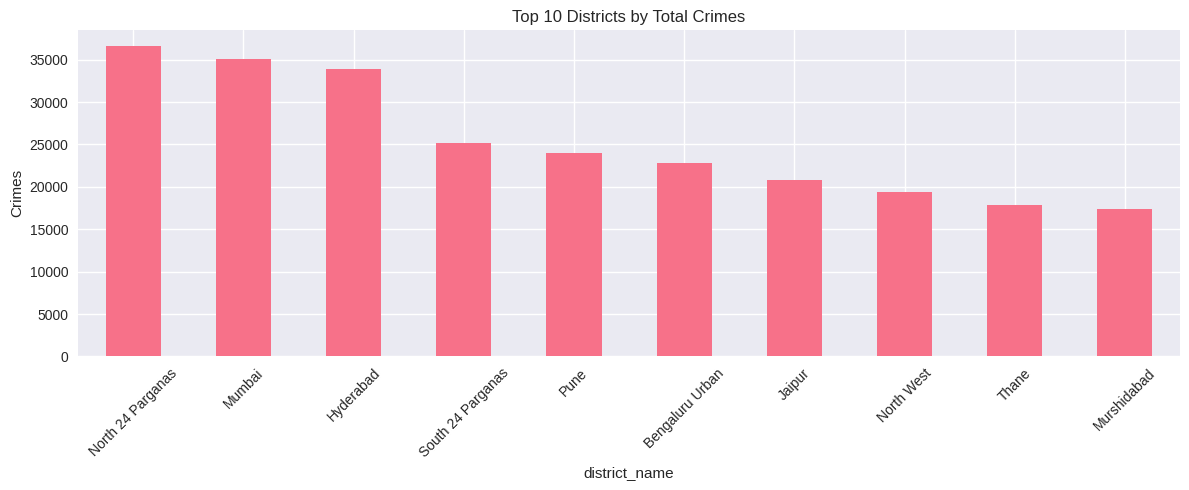

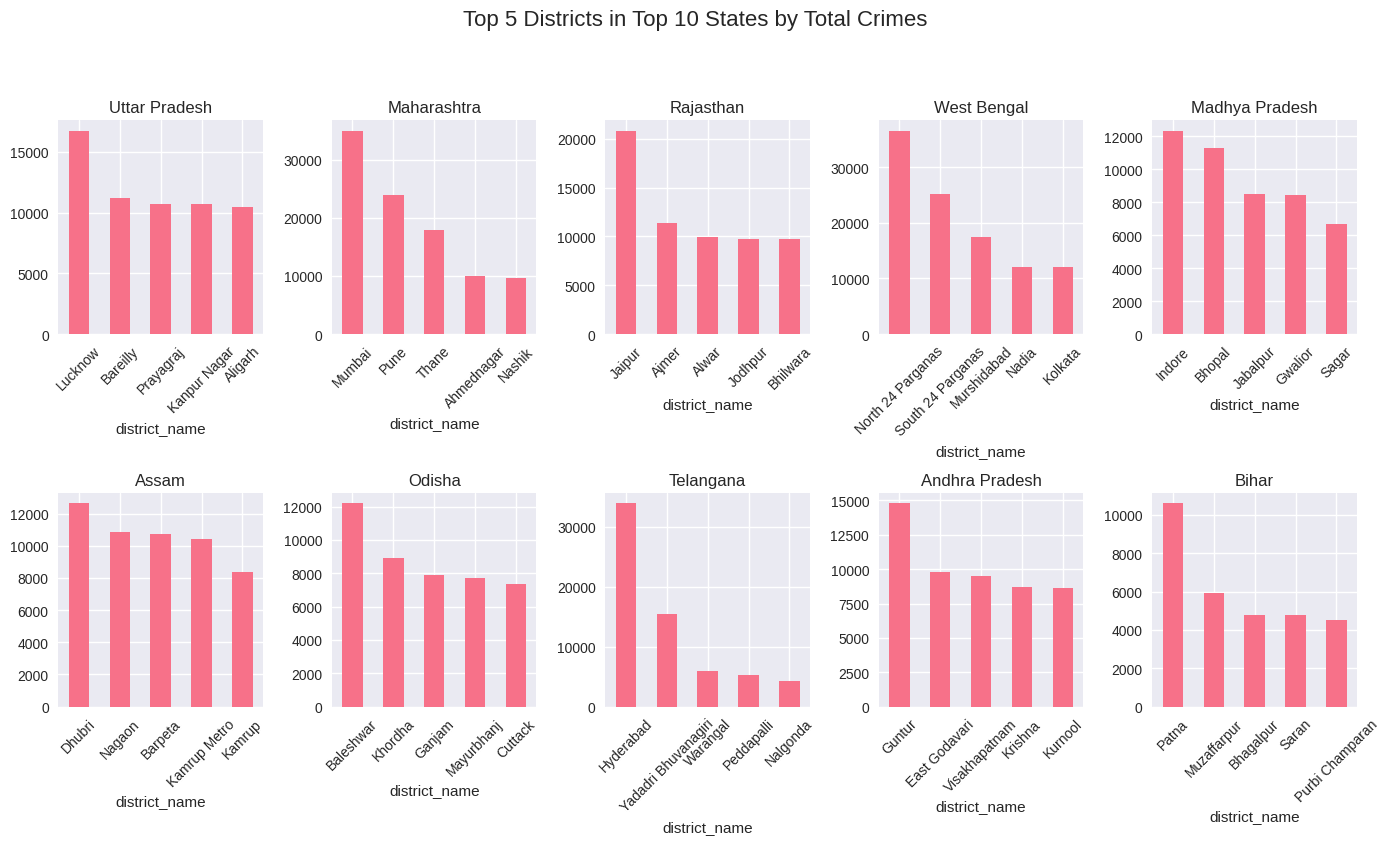

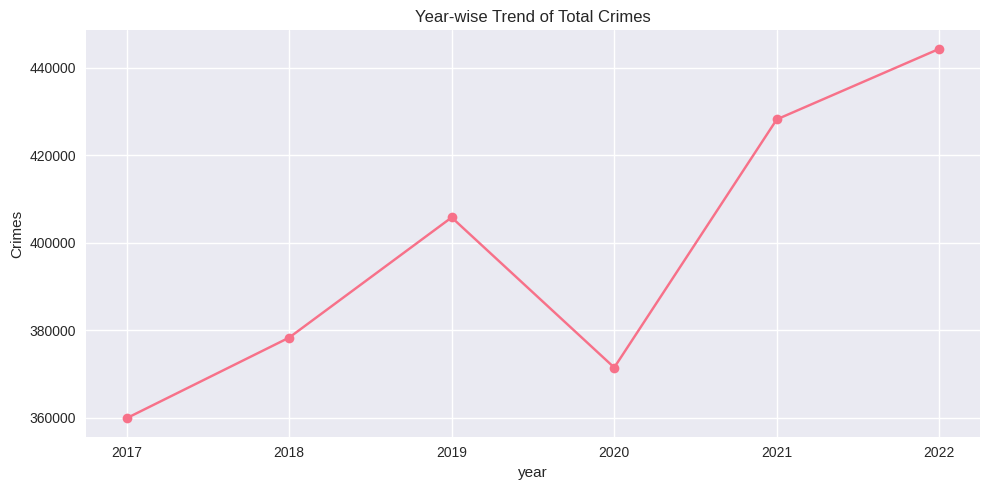

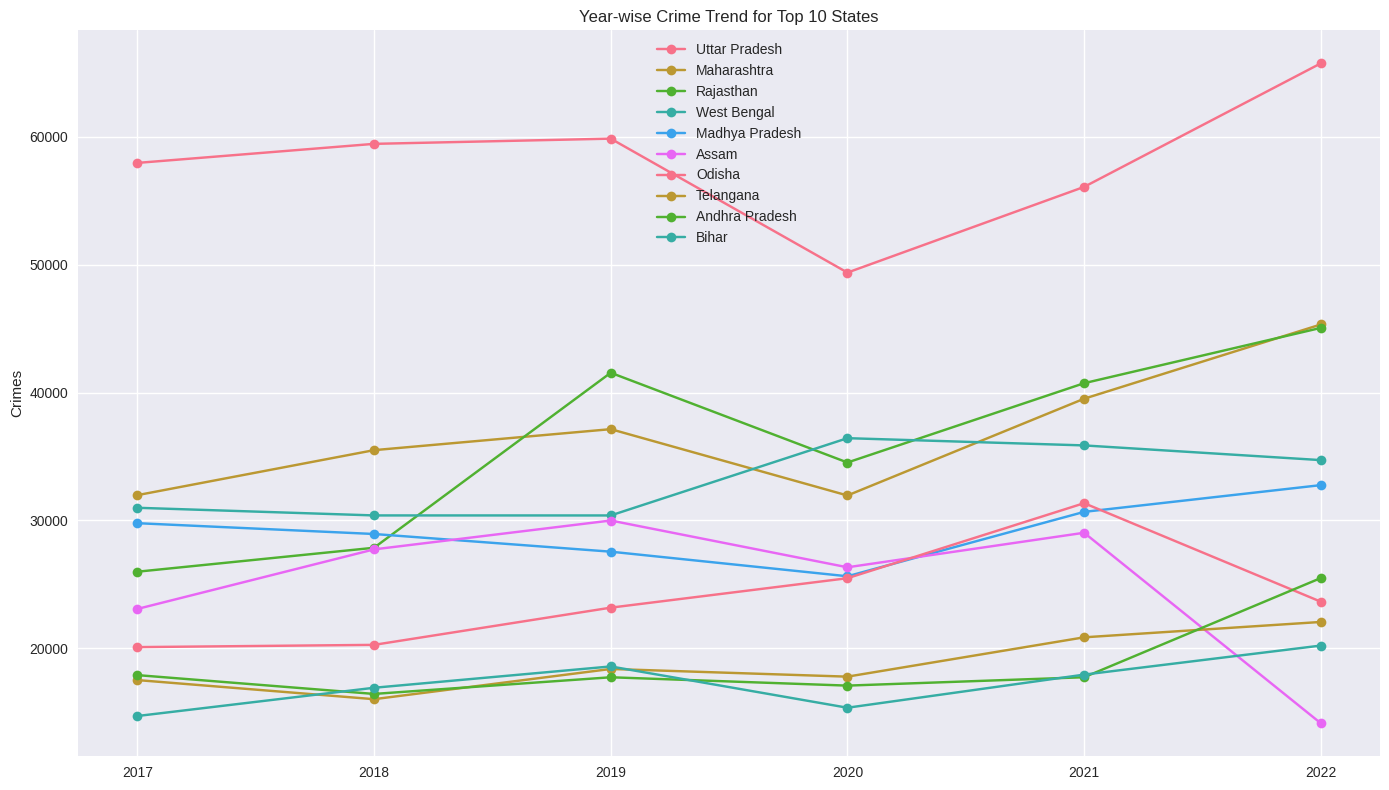

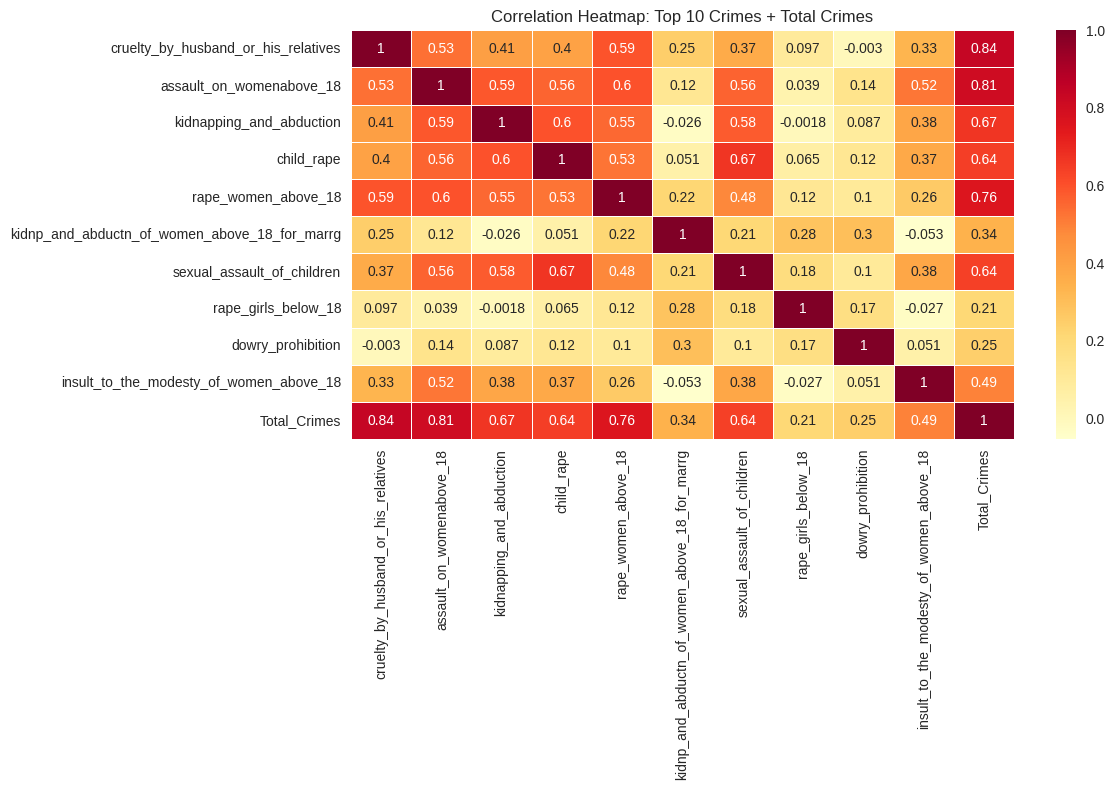

📋 Percentage of Total Crimes by State:

Andaman And Nicobar Islands: 0.04%
Andhra Pradesh: 4.71%
Arunachal Pradesh: 0.08%
Assam: 6.30%
Bihar: 4.34%
Chandigarh: 0.10%
Chhattisgarh: 2.00%
Delhi: 3.30%
Goa: 0.07%
Gujarat: 2.03%
Haryana: 3.63%
Himachal Pradesh: 0.39%
Jammu And Kashmir: 0.87%
Jharkhand: 1.89%
Karnataka: 3.62%
Kerala: 2.98%
Ladakh: 0.00%
Lakshadweep: 0.01%
Madhya Pradesh: 7.34%
Maharashtra: 9.27%
Manipur: 0.07%
Meghalaya: 0.15%
Mizoram: 0.05%
Nagaland: 0.01%
Odisha: 6.03%
Puducherry: 0.03%
Punjab: 1.34%
Rajasthan: 9.03%
Sikkim: 0.04%
Tamil Nadu: 1.74%
Telangana: 4.72%
The Dadra And Nagar Haveli And Daman And Diu: 0.02%
Tripura: 0.23%
Uttar Pradesh: 14.59%
Uttarakhand: 0.67%
West Bengal: 8.33%


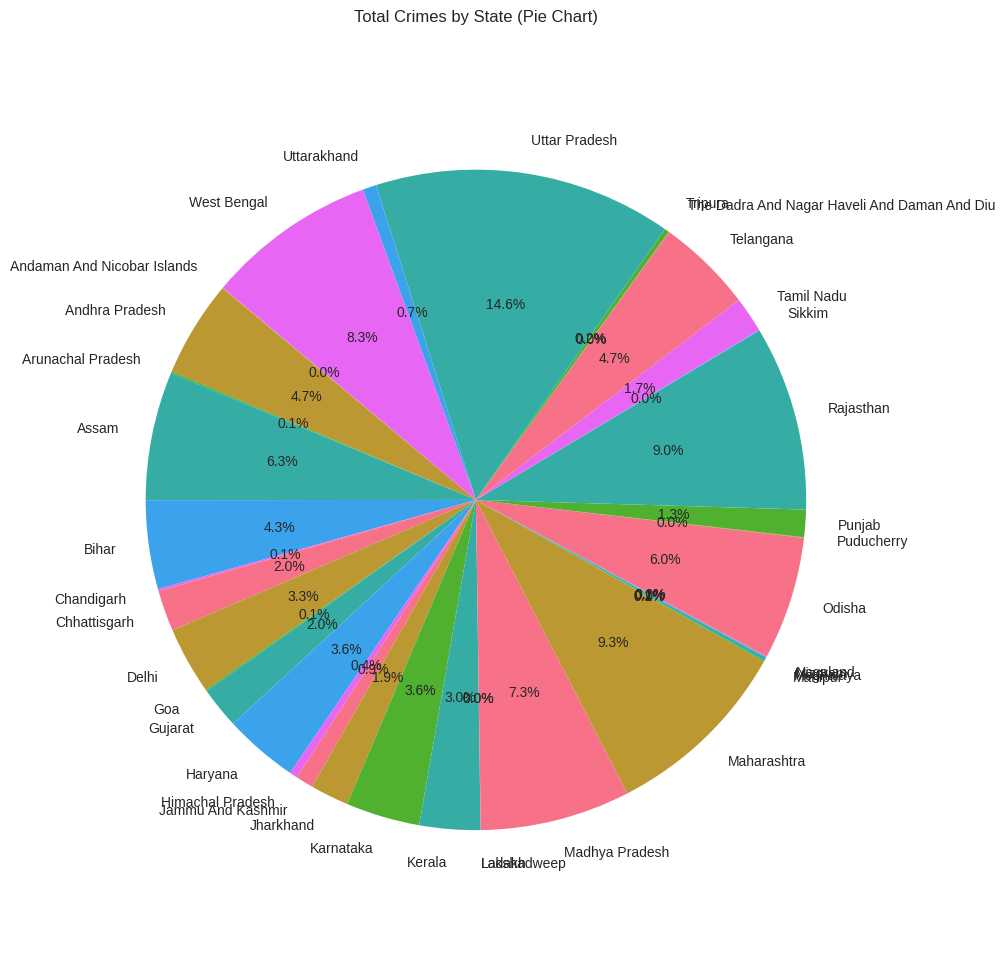

In [24]:
# 📦 Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🧾 Load the dataset (change path if necessary)
df = pd.read_csv("/kaggle/input/data-analytics/districtwise-crime-against-women-2017-onwards (1).csv")

# 🏷️ Rename columns (if needed)
df.columns = ['id', 'year', 'state_name', 'state_code', 'district_name', 'district_code', 'registration_circles',
              'murder_with_rape_gang_rape', 'dowry_deaths', 'abetment_to_suicide_of_women', 'miscarriage',
              'acid_attack', 'attempt_to_acid_attack', 'cruelty_by_husband_or_his_relatives', 'kidnapping_and_abduction',
              'kidnapping_abduction_in_order_to_murder', 'kidnapping_for_ransom',
              'kidnp_and_abductn_of_women_above_18_for_marrg', 'kidnp_and_abductn_of_girls_below_18_for_marrg',
              'procuration_of_minor_girls', 'importation_of_girls_from_foreign',
              'kidnapping_and_abduction_of_women_others', 'human_trafficking', 'selling_of_minor_girls',
              'buying_of_minor_girls', 'rape_women_above_18', 'rape_girls_below_18',
              'attempt_to_commit_rape_above_18', 'attempt_to_commit_rape_girls_below_18',
              'assault_on_womenabove_18', 'assault_on_women_below_18',
              'insult_to_the_modesty_of_women_above_18', 'insult_to_the_modesty_of_women_below_18',
              'dowry_prohibition', 'procuring_inducing_children_for_the_sake_of_prostitution',
              'detaining_a_prsn_in_premises_where_prost_is_carried',
              'prostitution_in_or_in_the_vicinity_of_public_places',
              'seducing_or_soliciting_for_purpose_of_prostitution', 'other_sections_under_itp_act',
              'protection_of_women_from_domestic_violence',
              'publshng_or_transmitting_of_sexually_explicit_mtrl',
              'other_women_centric_cyber_crimes', 'child_rape', 'sexual_assault_of_children',
              'child_sexual_harassment', 'use_of_child_for_pornography',
              'offences_of_pocso_act', 'pocso_act_unnatural_offences', 'indecent_representation_of_women']

# 🎯 Create Total_Crimes column
crime_cols = df.columns[7:]
df["Total_Crimes"] = df[crime_cols].sum(axis=1)

# 🔍 Summary Statistics
print("\nSummary Statistics:")
print(df[crime_cols.tolist() + ["Total_Crimes"]].describe())

# 📊 Top 10 Districts
top_districts = df.groupby("district_name")["Total_Crimes"].sum().sort_values(ascending=False).head(10)
top_districts.plot(kind='bar', figsize=(12, 5), title="Top 10 Districts by Total Crimes")
plt.ylabel("Crimes"); plt.xticks(rotation=45); plt.tight_layout(); plt.show()

# 📊 Top 10 States and their Top 5 Districts
top_states = df.groupby("state_name")["Total_Crimes"].sum().sort_values(ascending=False).head(10).index.tolist()
df_top_states = df[df["state_name"].isin(top_states)]

plt.figure(figsize=(14, 8))
for i, state in enumerate(top_states):
    top5_districts = df_top_states[df_top_states["state_name"] == state].groupby("district_name")["Total_Crimes"].sum().sort_values(ascending=False).head(5)
    plt.subplot(2, 5, i+1)
    top5_districts.plot(kind="bar")
    plt.title(state)
    plt.xticks(rotation=45)
    plt.tight_layout()

plt.suptitle("Top 5 Districts in Top 10 States by Total Crimes", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

# 📈 Year-wise Trend (Overall)
yearly_trend = df.groupby("year")["Total_Crimes"].sum()
yearly_trend.plot(marker='o', figsize=(10, 5), title="Year-wise Trend of Total Crimes")
plt.ylabel("Crimes"); plt.grid(True); plt.tight_layout(); plt.show()

# 📈 Year-wise Trend (State-wise)
plt.figure(figsize=(14, 8))
for state in top_states:
    state_data = df[df["state_name"] == state].groupby("year")["Total_Crimes"].sum()
    plt.plot(state_data, marker='o', label=state)
plt.title("Year-wise Crime Trend for Top 10 States")
plt.ylabel("Crimes")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# 🔝 Step 1: Calculate total for each crime column
crime_totals = df[crime_cols].sum().sort_values(ascending=False)

# 🔟 Step 2: Select top 10 crime columns
top_10_crimes = crime_totals.head(10).index.tolist()

# 🧮 Step 3: Add 'Total_Crimes' for context
heatmap_cols = top_10_crimes + ['Total_Crimes']

# 🔥 Step 4: Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df[heatmap_cols].corr(), cmap="YlOrRd", annot=True, linewidths=0.5)
plt.title("Correlation Heatmap: Top 10 Crimes + Total Crimes")
plt.tight_layout()
plt.show()
state_crime_totals = df.groupby("state_name")["Total_Crimes"].sum().sort_values(ascending=False)

# 🎨 Plot pie chart
#📊 Group total crimes by state
state_crimes = df.groupby("state_name")["Total_Crimes"].sum()

# 💯 Calculate percentages
state_percent = (state_crimes / state_crimes.sum()) * 100

# 📌 Print state-wise percentages
print("📋 Percentage of Total Crimes by State:\n")
for state, percent in state_percent.items():
    print(f"{state}: {percent:.2f}%")

# 🥧 Pie chart
plt.figure(figsize=(10, 10))
plt.pie(state_crimes, labels=state_crimes.index, autopct='%1.1f%%', startangle=140)
plt.title("Total Crimes by State (Pie Chart)")
plt.axis('equal')  # Equal aspect ratio ensures pie is a circle.
plt.tight_layout()
plt.show()